# ADFA-LD - Logistic Regression 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
import glob
import math
from collections import Counter
import csv

import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
# returns a dictionary of n-grams frequency for any list
def ngrams_freq(listname, n):
    counts = dict()
    # make n-grams as string iteratively
    grams = [' '.join(listname[i:i+n]) for i in range(len(listname)-n)]
    for gram in grams:
        if gram not in counts:
            counts[gram] = 1
        else:
            counts[gram] += 1
    return counts

# returns the values of features for any list
def feature_freq(listname,n,features):
	counts = dict()
	# make n-grams as string iteratively
	grams = [' '.join(listname[i:i+n]) for i in range(len(listname)-n)]
	for gram in grams:
		counts[gram] = 0
	for gram in grams:
		if gram in features:
			counts[gram] += 1
	return counts

# values of n for finding n-grams
n_values = [1]

# Base address for attack data files
add = "ADFA-LD/ADFA-LD/Attack_Data_Master/"
# list of attacks
attack = ['Adduser','Hydra_FTP','Hydra_SSH','Java_Meterpreter','Meterpreter','Web_Shell']

# initializing dictionary for n-grams from all files
traindict = {}

Attack_list_new = []
print("Generating Training Data ..................................")
for term in attack:
	print("	Training data from " + term)
	globals()['%s_list' % term] = []
	in_address = add+term
	k = 1
	# finding list of data from all files
	for i in range (1,11):
		read_files = glob.glob(in_address+"_"+str(i)+"/*.txt")
		for f in read_files:
			with open(f, "r") as infile:
				globals()['%s_list_array' % term+str(k)] = ALine =infile.read()
				#ALine = ALine[:820]                
				Attack_list_new.append(term +','+ str(ALine))
				globals()['%s_list' % term].extend(globals()['%s_list_array' % term+str(k)])
				k += 1
	# number of lists for distinct files
	globals()['%s_size' % term] = k-1
	# combined list of all files
	listname = globals()['%s_list' % term]
	# finding n-grams and extracting top 30%
	for n in n_values:
		#print("		Extracting top 30% "+str(n)+"-grams from "+term+".......................")
		dictname = ngrams_freq(listname,n)
		top = math.ceil(0.3*len(dictname))
		dictname = Counter(dictname)
		for k, v in dictname.most_common(top):
			traindict.update({k : v})

# finding training data for Normal file
print("	Training data from Normal")
Normal_list = []
Normal_list_new = []
in_address = "ADFA-LD/ADFA-LD/Training_Data_Master/"
k = 1
read_files = glob.glob(in_address+"/*.txt")
for f in read_files:
	with open(f, "r") as infile:
		globals()['Normal%s_list_array' % str(k)] = Line = infile.read()
		Normal_list_new.append('Normal,'+ str(Line))
		Normal_list.extend(globals()['Normal%s_list_array' % str(k)])
		k += 1

# number of lists for distinct files
Normal_list_size = k-1
# combined list of all files
listname = Normal_list


print("\nnew_train.csv created..............................................\n")


Generating Training Data ..................................
	Training data from Adduser
	Training data from Hydra_FTP
	Training data from Hydra_SSH
	Training data from Java_Meterpreter
	Training data from Meterpreter
	Training data from Web_Shell
	Training data from Normal

new_train.csv created..............................................



In [3]:
new_train_list = []
new_train_list = Normal_list_new + Attack_list_new
#new_train_list[1]
#Attack_list_new[1]


In [4]:
new_train_list = []
new_train_list = Normal_list_new + Attack_list_new


with open('new_train.csv', 'w') as f:
    for item in new_train_list:
        f.write("%s\n" % item)       

In [5]:
train = pd.read_csv("./new_train.csv", sep=',',error_bad_lines=False, header=None, names=['Label','CallTrace'])
train.head(5)
train.shape
#train.info()

#train.describe(include = 'all')
train_df = train.copy()
train['Label'] = train['Label'].astype('category')
train['CallTrace'] = train['CallTrace'].astype('category')

train['Label'].value_counts()
#train['CallTrace'].value_counts()

Normal              833
Hydra_SSH           176
Hydra_FTP           162
Java_Meterpreter    124
Web_Shell           118
Adduser              91
Meterpreter          75
Name: Label, dtype: int64

In [6]:
train['Label_Codes'] = train['Label'].cat.codes
train['CallTrace_Codes'] = train['CallTrace'].cat.codes
train['Label_Codes'].value_counts()

5    833
2    176
1    162
3    124
6    118
0     91
4     75
Name: Label_Codes, dtype: int64

In [7]:
train.head()

,Label,CallTrace,Label_Codes,CallTrace_Codes
0,Normal,6 6 63 6 42 120 6 195 120 6 6 114 114 1 1 252 ...,5,1407
1,Normal,54 175 120 175 175 3 175 175 120 175 120 175 1...,5,1239
2,Normal,6 11 45 33 192 33 5 197 192 6 33 5 3 197 192 1...,5,1286
3,Normal,7 174 174 5 197 197 6 13 195 4 4 118 6 91 38 5...,5,1465
4,Normal,11 45 33 192 33 5 197 192 6 33 5 3 197 192 192...,5,93


# Multinominal Logistic Regression

In [8]:
import warnings
warnings.filterwarnings("ignore")

# split the dataset in train and test
X = train.iloc[:, [3]].values
y = train.iloc[:, 2].values


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class='ovr', solver = 'lbfgs')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# How did our model perform?
from sklearn import metrics
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))




Misclassified samples: 145
Accuracy: 0.54


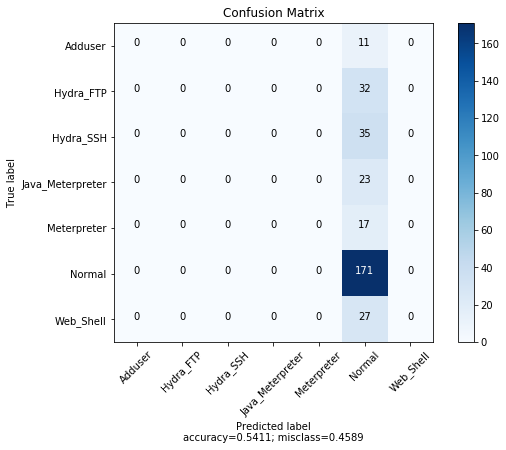

In [9]:
#classifier.predict_proba(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,  
                      normalize    = False,
                      target_names = ['Adduser', 'Hydra_FTP', 'Hydra_SSH', 'Java_Meterpreter', 'Meterpreter', 'Normal', 'Web_Shell'],
                      title        = "Confusion Matrix")

# Logistic Regression Binary Classification

In [10]:
train.loc[train.Label != 'Normal','Label_Binary']= 1
train.loc[train.Label == 'Normal','Label_Binary']= 0
train['Label_Binary'].value_counts()
#train.head()

0.0    833
1.0    746
Name: Label_Binary, dtype: int64

In [11]:
train.head()

,Label,CallTrace,Label_Codes,CallTrace_Codes,Label_Binary
0,Normal,6 6 63 6 42 120 6 195 120 6 6 114 114 1 1 252 ...,5,1407,0.0
1,Normal,54 175 120 175 175 3 175 175 120 175 120 175 1...,5,1239,0.0
2,Normal,6 11 45 33 192 33 5 197 192 6 33 5 3 197 192 1...,5,1286,0.0
3,Normal,7 174 174 5 197 197 6 13 195 4 4 118 6 91 38 5...,5,1465,0.0
4,Normal,11 45 33 192 33 5 197 192 6 33 5 3 197 192 192...,5,93,0.0


In [12]:
import warnings
warnings.filterwarnings("ignore")

# split the dataset in train and test
X = train.iloc[:, [3]].values
y = train.iloc[:, 4].values


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(multi_class='ovr', solver = 'lbfgs')
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# How did our model perform?
from sklearn import metrics
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))




Misclassified samples: 156
Accuracy: 0.51


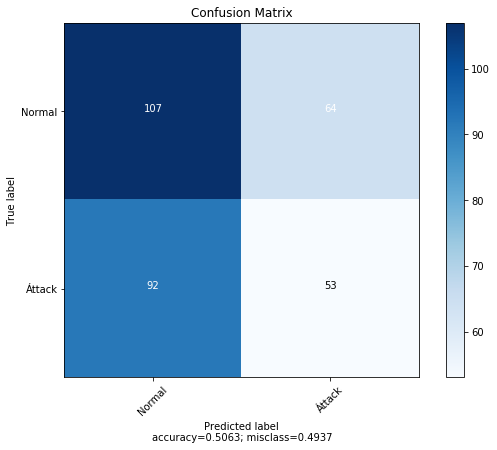

In [13]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,  
                      normalize    = False,
                      target_names = ['Normal', 'Áttack'],
                      title        = "Confusion Matrix")